In [154]:
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display, HTML

In [155]:
def plot_dynamics(dynamics, mode, header):
    assert mode in ('region', 'all'), 'Incorrect mode!'

    fig, ax1 = plt.subplots(figsize=(10, 6))

    styles = ['k--', 'k-']
    regions = dynamics['Регион']

    if mode == 'all':
        ax1.plot(dynamics.columns[1:], dynamics.iloc[0, 1:].values, styles[0], label=regions[0])
        ax1.set_ylabel('Значения для ' + regions[0], color='k')

    ax1.tick_params(axis='y', labelcolor='k')
    ax1.set_xlabel('Годы')
    ax1.grid()

    ax2 = ax1.twinx()
    ax2.plot(dynamics.columns[1:], dynamics.iloc[1, 1:].values, styles[1], label=regions[1])
    ax2.set_ylabel('Значения для ' + regions[1], color='k')
    ax2.tick_params(axis='y', labelcolor='k')

    plt.suptitle(header, y=-0.01, fontsize='medium')

    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

    plt.tight_layout()
    plt.show()

In [156]:
footer = 'Рассчитано по данным Федеральной службы государственной статистики (Росстат).'

### 1. Динамика стоимости основных фондов Российской Федерации и г. Москвы:

In [157]:
header = 'Динамика стоимости основных фондов Российской Федерации и г. Москвы за 2000–2016 гг., млн. руб.'

In [158]:
dynamics = pd.read_excel('СОФ.xlsx', engine='openpyxl')

In [159]:
display(HTML(f'Таблица 1. {header}'))
display(dynamics)
display(HTML(footer))

,Регион,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Российская Федерация,17464172,21495236,26333273,32173286,34873724,41493568,47489498,60391454,74441095,82302969,93185612,108001247,121268908,133521531,147429656,160725261,183403693
1,г. Москва,1444737,1841258,2255912,3297504,3905553,5346984,6142520,9506888,14877108,15356818,17905142,20169118,23445895,26546945,28890410,30078000,36338093


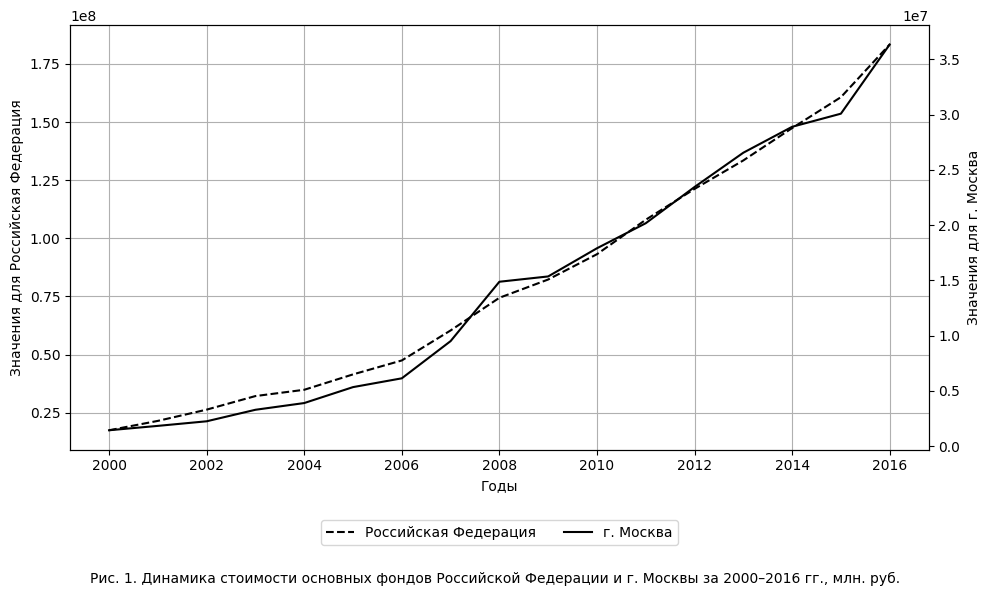

In [160]:
plot_dynamics(dynamics=dynamics, mode='all', header=f'Рис. 1. {header}')

### 2. Темпы прироста стоимости основных фондов Российской Федерации и г. Москвы:

In [161]:
header = 'Темпы прироста стоимости основных фондов Российской Федерации и г. Москвы за 2001–2016 гг., %.'

In [162]:
dynamics = pd.read_excel('СОФ.xlsx', engine='openpyxl')

In [163]:
growth_rates = dynamics.set_index('Регион').pct_change(axis=1).mul(100).reset_index()
growth_rates = growth_rates.drop(columns=dynamics.columns[1])

display(HTML(f'Таблица 2. {header}'))
display(growth_rates)
display(HTML(footer))

,Регион,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Российская Федерация,23.081907,22.507485,22.177315,8.393417,18.982326,14.450264,27.168019,23.264287,10.561201,13.222662,15.899059,12.284729,10.103680,10.416391,9.018270,14.110061
1,г. Москва,27.445895,22.520147,46.171659,18.439674,36.907219,14.878219,54.771787,56.487675,3.224484,16.594089,12.644278,16.246506,13.226409,8.827626,4.110672,20.812863


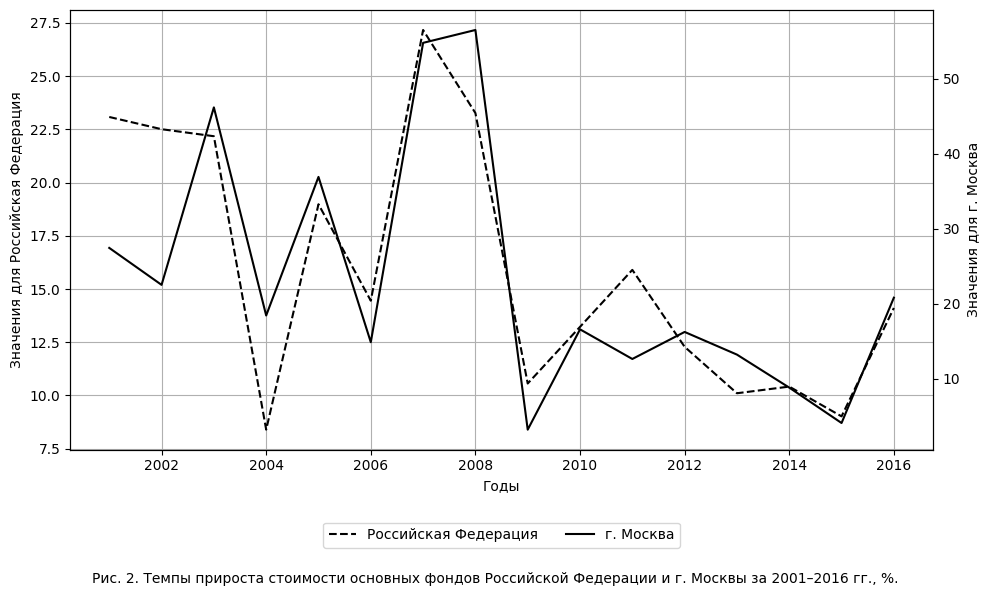

In [164]:
plot_dynamics(dynamics=growth_rates, mode='all', header=f'Рис. 2. {header}')

### 3. Динамика доли г. Москвы в общей стоимости основных фондов Российской Федерации:

In [165]:
header = 'Динамика доли г. Москвы в общей стоимости основных фондов Российской Федерации за 2000–2016 гг., %.'

In [166]:
dynamics = pd.read_excel('СОФ.xlsx', engine='openpyxl')

In [167]:
values = dynamics.set_index('Регион').loc['Российская Федерация']
result_dynamics = dynamics.copy()
result_dynamics.iloc[:, 1:] = (dynamics.iloc[:, 1:].div(values, axis=1) * 100)

display(HTML(f'Таблица 3. {header}'))
display(result_dynamics)
display(HTML(footer))

,Регион,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Российская Федерация,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,г. Москва,8.272577,8.565889,8.566774,10.249199,11.199128,12.886296,12.934481,15.742108,19.985074,18.658887,19.214492,18.674894,19.333806,19.882145,19.596064,18.713922,19.813174


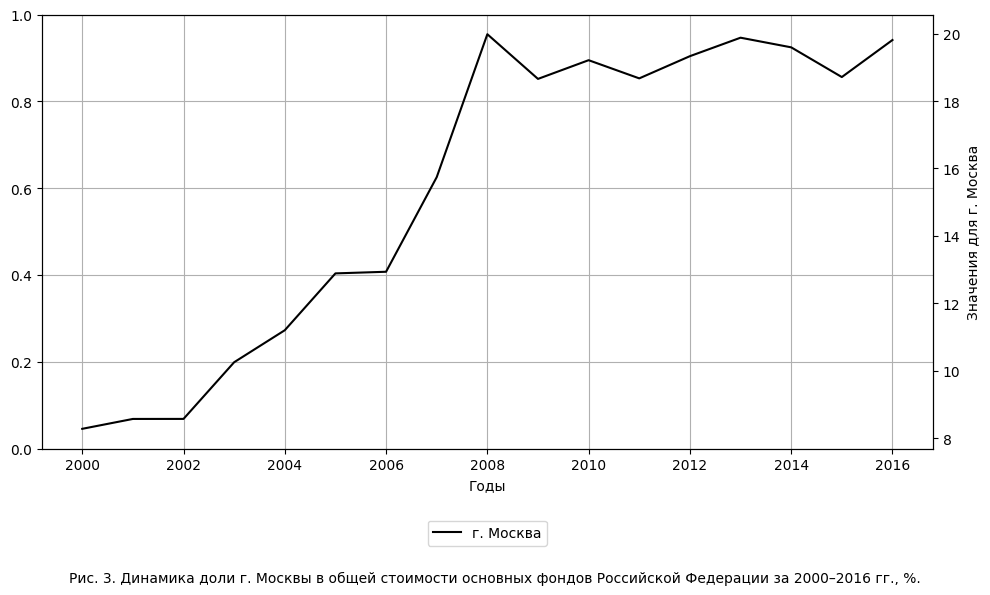

In [168]:
plot_dynamics(dynamics=result_dynamics, mode='region', header=f'Рис. 3. {header}')

### 4. Темпы прироста стоимости основных фондов Российской Федерации и г. Москвы в сопоставимых ценах:

In [169]:
header = 'Темпы прироста стоимости основных фондов Российской Федерации и г. Москвы в сопоставимых ценах за 2001–2016 гг., %.'

In [170]:
dynamics = pd.read_excel('СОФ.xlsx', engine='openpyxl')

In [171]:
real_values = dynamics.copy()
base_values = real_values.iloc[:, 1]
real_values.iloc[:, 1:] = (real_values.iloc[:, 1:].div(base_values, axis=0)) * 100

growth_rates = real_values.set_index('Регион').pct_change(axis=1).mul(100).reset_index()
growth_rates = growth_rates.drop(columns=real_values.columns[1])

display(HTML(f'Таблица 4. {header}'))
display(growth_rates)
display(HTML(footer))

,Регион,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Российская Федерация,23.081907,22.507485,22.177315,8.393417,18.982326,14.450264,27.168019,23.264287,10.561201,13.222662,15.899059,12.284729,10.103680,10.416391,9.018270,14.110061
1,г. Москва,27.445895,22.520147,46.171659,18.439674,36.907219,14.878219,54.771787,56.487675,3.224484,16.594089,12.644278,16.246506,13.226409,8.827626,4.110672,20.812863


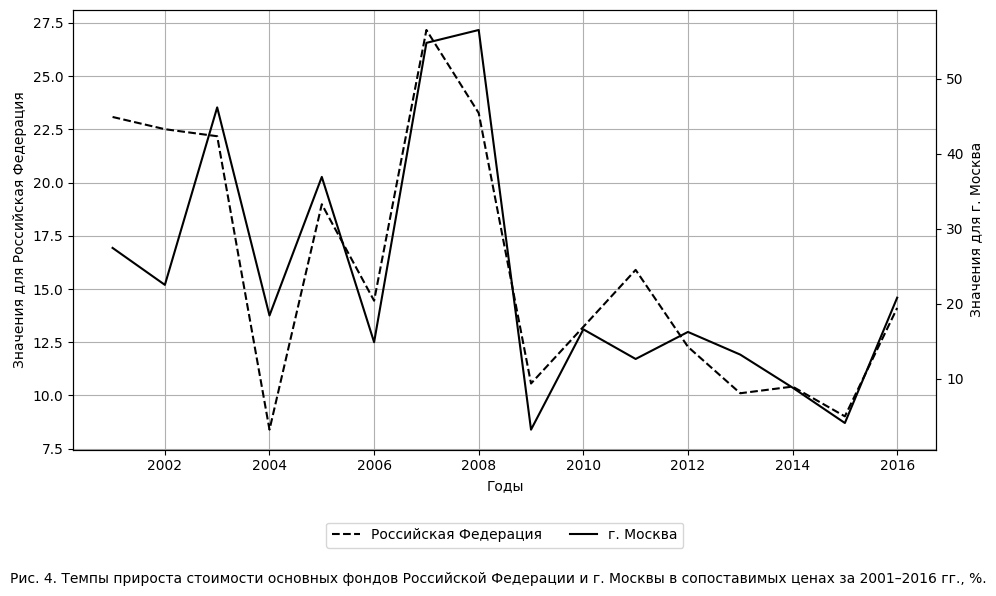

In [172]:
plot_dynamics(dynamics=growth_rates, mode='all', header=f'Рис. 4. {header}')

### 5. Динамика численности занятых в Российской Федерации и г. Москвы:

In [173]:
header = 'Динамика численности занятых в Российской Федерации и г. Москвы за 2010–2020 гг., тыс. чел.'

In [174]:
dynamics = pd.read_excel('ЧЗ.xlsx', engine='openpyxl')

In [175]:
display(HTML(f'Таблица 5. {header}'))
display(dynamics)
display(HTML(footer))

,Регион,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Российская Федерация,69933.7,70856.6,71545.4,71391.5,71539.043570,72323.622532,72392.628127,72315.935931,72531.639887,71933.080926,70601.387430
1,г. Москва,6321.5,6548.2,6745.2,6762.2,6982.879506,6942.317292,7106.771671,7095.399693,7177.674956,7208.447948,7128.933926


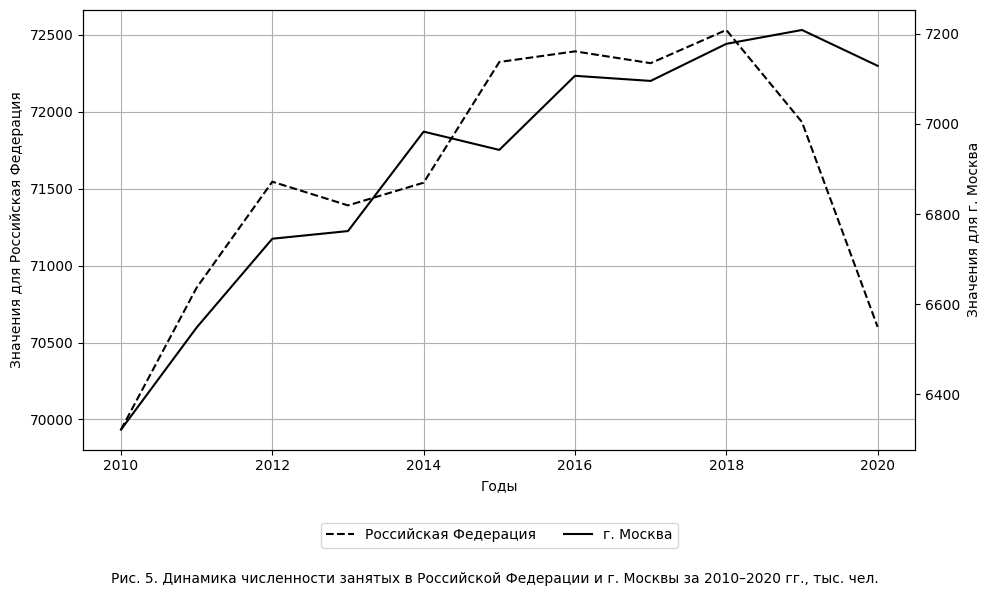

In [176]:
plot_dynamics(dynamics=dynamics, mode='all', header=f'Рис. 5. {header}')

### 6. Динамика среднемесячной номинальной начисленной заработной платы работников организаций в Российской Федерации и г. Москвы:

In [177]:
header = (
    'Динамика среднемесячной номинальной начисленной заработной платы\n\n'
    'работников организаций в Российской Федерации и г. Москвы за 2000–2022 гг., руб.'
)

In [178]:
dynamics = pd.read_excel('СННЗП.xlsx', engine='openpyxl')

In [179]:
display(HTML(f'Таблица 6. {header}'))
display(dynamics)
display(HTML(footer))

,Регион,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Российская Федерация,2223.4,3240.4,4360.3,5498.5,6739.5,8554.9,10633.9,13593.4,17290.1,...,29792.0,32495,34030,36709,39167,43724,47867,51344,57244,65338.3
1,г. Москва,3229.3,4924.2,6388.4,8611.6,10634.0,14424.6,17997.9,23623.3,30552.1,...,55485.2,61208,64310,71379,73812,83801,94294,100070,112768,125637.6


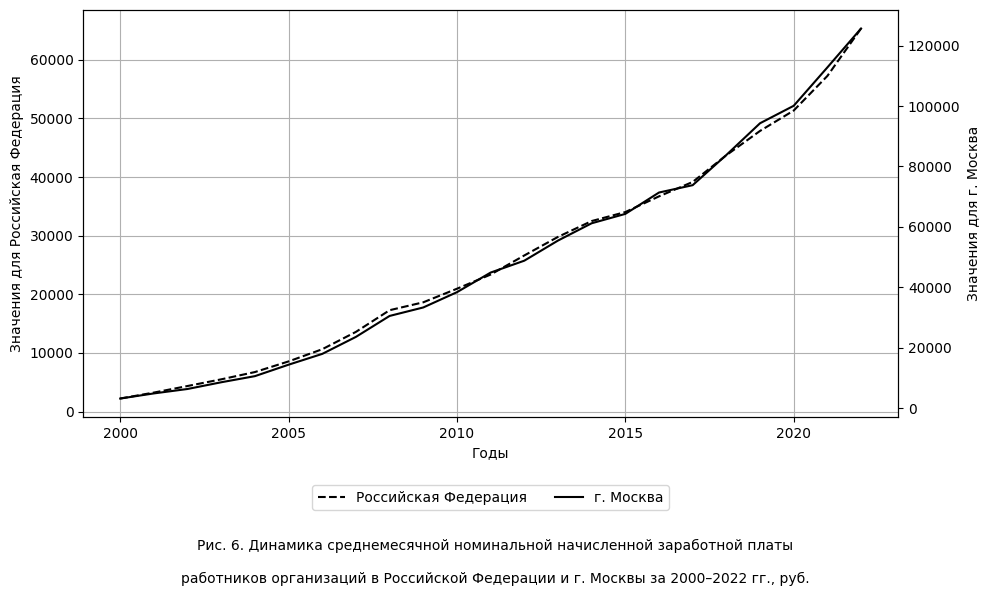

In [180]:
plot_dynamics(dynamics=dynamics, mode='all', header=f'Рис. 6. {header}')

---